In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # random forest
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # gradient boosting
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer


from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score


R2 ALL:  0.009298437544199678
R2-FG%:  0.004671031853182073
R2-3P%:  0.0065376189706719545
R2-FT%:  0.009100190034949773
R2-TRB:  0.008215299435959444
R2-AST:  0.008925522791417784
R2-STL:  0.008840116557501276
R2-BLK :  0.008268150419205034


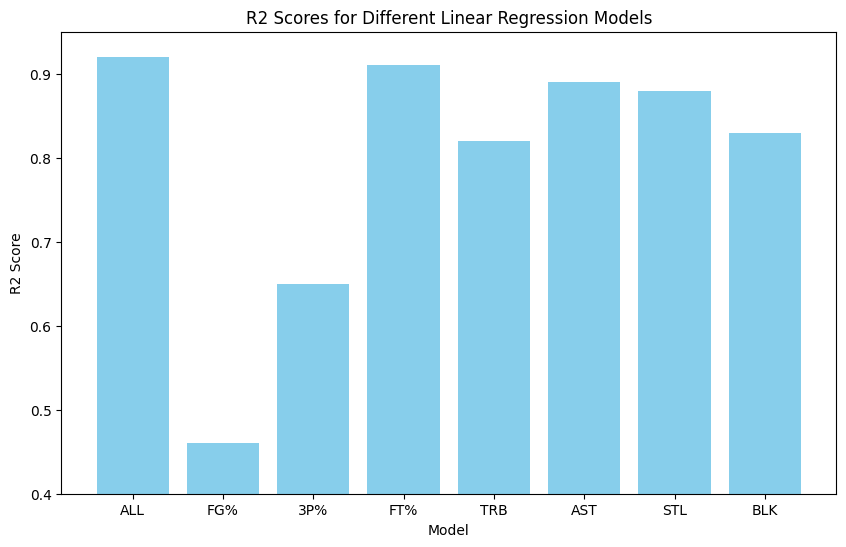

In [ ]:
#Question 1

#ALL VARIABLES
# Load and clean the data
nba = pd.read_csv("https://nam11.safelinks.protection.outlook.com/?url=https%3A%2F%2Fraw.githubusercontent.com%2Fandrewjingalls%2Fchapman%2Fmain%2FNBA_PLAYER_DATA.csv&data=05%7C02%7Csleimel%40chapman.edu%7C4ed656ab0ec44748b2c308dbf904b208%7C809929af2d2545bf9837089eb9cfbd01%7C1%7C0%7C638377571246575429%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C1000%7C%7C%7C&sdata=6bXI0DMlNFUNYlmPkuGlb7TfkeQi8ww7IIOoDzOXmQQ%3D&reserved=0")
# check null
nba.isnull().sum()
# drop missing
nba.dropna(inplace = True)
nba.reset_index(inplace = True)

# set up X and y
predictors = ["FG%", "3P%", "FT%", "TRB", "AST", "STL", "BLK"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2 ALL: ", r2_score(y,y_pred))

#ALL VARIABLES - FG%
predictors = ["3P%", "FT%", "TRB", "AST", "STL", "BLK"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2-FG%: ", r2_score(y,y_pred))

#ALL VARIABLES - 3P%
# set up X and y
predictors = ["FG%", "FT%", "TRB", "AST", "STL", "BLK"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2-3P%: ", r2_score(y,y_pred))

#ALL VARIABLES - FT%
# set up X and y
predictors = ["FG%", "3P%", "TRB", "AST", "STL", "BLK"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2-FT%: ", r2_score(y,y_pred))

#ALL VARIABLES - TRB
# set up X and y
predictors = ["FG%", "3P%", "FT%", "AST", "STL", "BLK"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2-TRB: ", r2_score(y,y_pred))

#ALL VARIABLES - AST
# set up X and y
predictors = ["FG%", "3P%", "FT%", "TRB", "STL", "BLK"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2-AST: ", r2_score(y,y_pred))

#ALL VARIABLES - STL
# set up X and y
predictors = ["FG%", "3P%", "FT%", "TRB", "AST", "BLK"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2-STL: ", r2_score(y,y_pred))

#ALL VARIABLES - BLK
# set up X and y
predictors = ["FG%", "3P%", "FT%", "TRB", "AST", "STL"]
X = nba[predictors]
y = nba["W/L%"]
# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")
lr = LinearRegression()
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])
pipe.fit(X,y)
y_pred = pipe.predict(X)
print("R2-BLK : ", r2_score(y,y_pred))

# Placeholder values for R2 scores from the models
# Replace these with your actual R2 values
R2_ALL = 0.92
R2_FG = 0.46
R2_3P = 0.65
R2_FT = 0.91
R2_TRB = 0.82
R2_AST = 0.89
R2_STL = 0.88
R2_BLK = 0.83

# Create a list of R2 values and their corresponding labels
r2_values = [R2_ALL, R2_FG, R2_3P, R2_FT, R2_TRB, R2_AST, R2_STL, R2_BLK]
labels = ['ALL', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, r2_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Linear Regression Models')
plt.ylim(0.40, 0.95)  # Adjust the y-axis limits to better display the differences
plt.show()

Variances:
Pos: 94.73715118114929
PTS: 12.292971274071032
TO: 27.291848370166317
TRB: 43.447649136926735


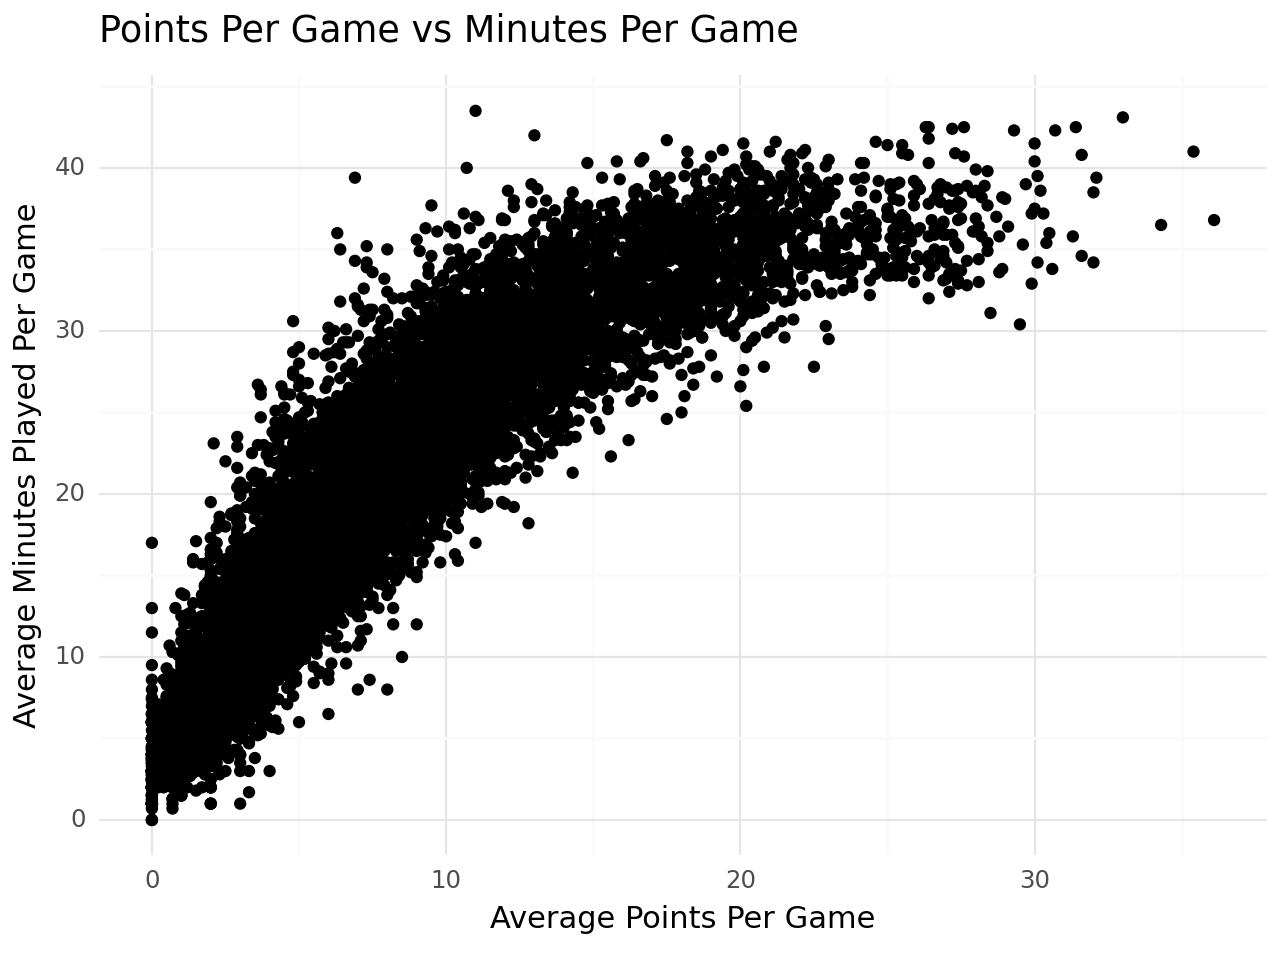

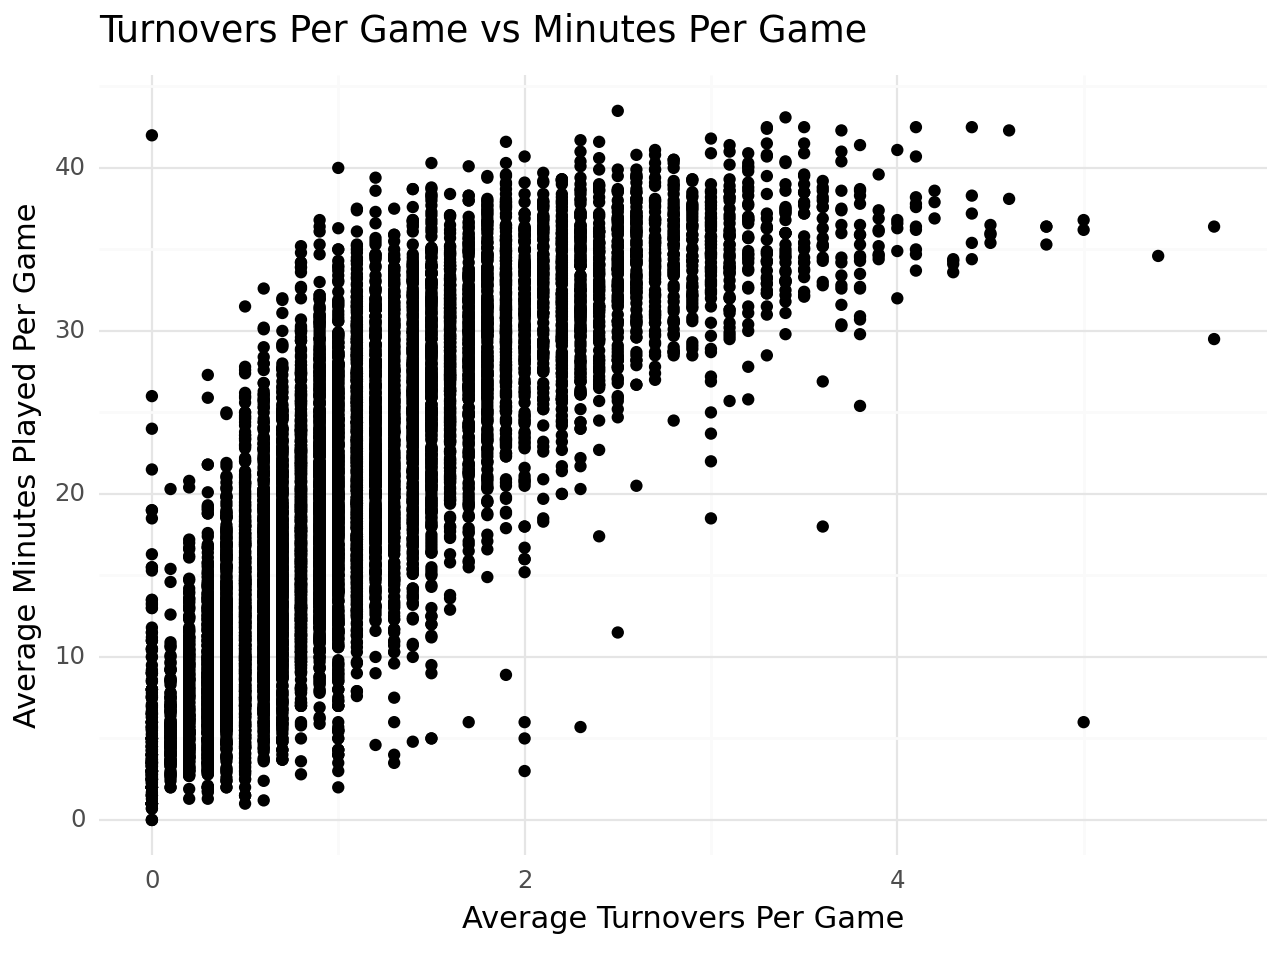

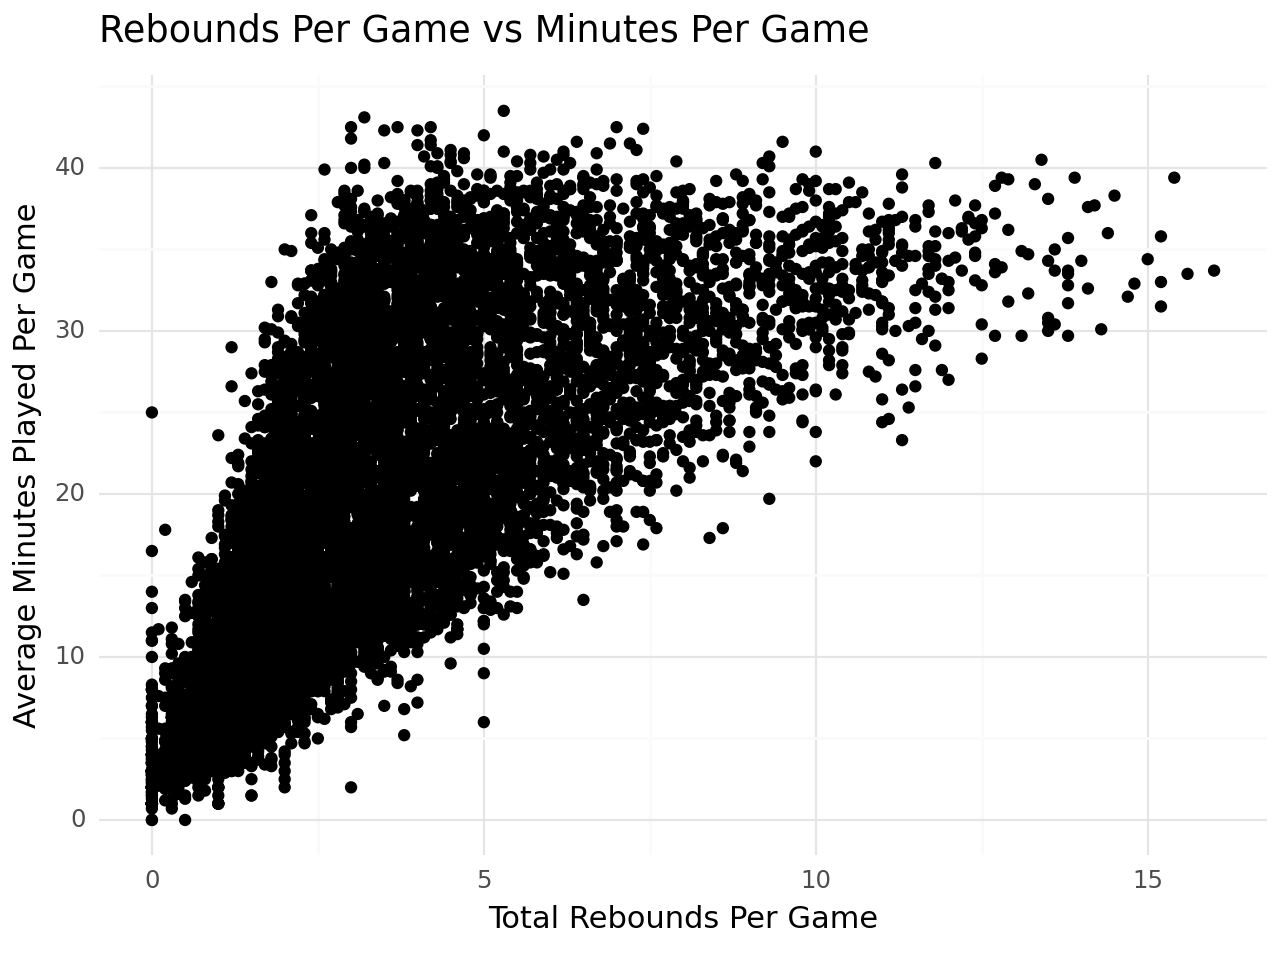

In [ ]:
#Question 2

nba = pd.read_csv('https://raw.githubusercontent.com/andrewjingalls/chapman/main/NBA_PLAYER_DATA.csv')

# drop missing values
nba.dropna(inplace = True)
nba.reset_index(inplace = True)

# set up X and y
predictors = ["Pos", "PTS", "TO", "TRB"]
contin = ["PTS", "TO", "TRB"]

X = nba[predictors]
y = nba["MP"]

# validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


# Create a list to store variances for each predictor
variances = []

for predictor in predictors:
    # Create a subset of X with the current predictor
    X_subset = nba[[predictor]]

    # Create a pipeline for the current predictor
    if predictor == "Pos":
        z = make_column_transformer(
            (OneHotEncoder(), ["Pos"]),
            remainder="passthrough"
        )
    else:
        z = make_column_transformer(
            (StandardScaler(), [predictor]),
            remainder="passthrough"
        )

    lr = LassoCV()

    pipe = Pipeline([
        ("zscore", z),
        ("poly", PolynomialFeatures(degree=2)),
        ("lasso", lr)
    ])

    # fit
    pipe.fit(X_subset, y)

    # predict
    y_pred = pipe.predict(X_subset)

    # calculate variance
    variance = mean_squared_error(y, y_pred)
    variances.append((predictor, variance))

# Print variances
print("Variances:")
for predictor, variance in variances:
    print(f"{predictor}: {variance}")


print((ggplot(nba, aes(x = "PTS", y = "MP")) + geom_point()
 + theme_minimal()
 + labs(x = "Average Points Per Game", y = "Average Minutes Played Per Game", title = "Points Per Game vs Minutes Per Game")))

print((ggplot(nba, aes(x = "TO", y = "MP")) + geom_point()
 + theme_minimal()
 + labs(x = "Average Turnovers Per Game", y = "Average Minutes Played Per Game", title = "Turnovers Per Game vs Minutes Per Game")))

print((ggplot(nba, aes(x = "TRB", y = "MP")) + geom_point()
 + theme_minimal()
 + labs(x = "Total Rebounds Per Game", y = "Average Minutes Played Per Game", title = "Rebounds Per Game vs Minutes Per Game")))



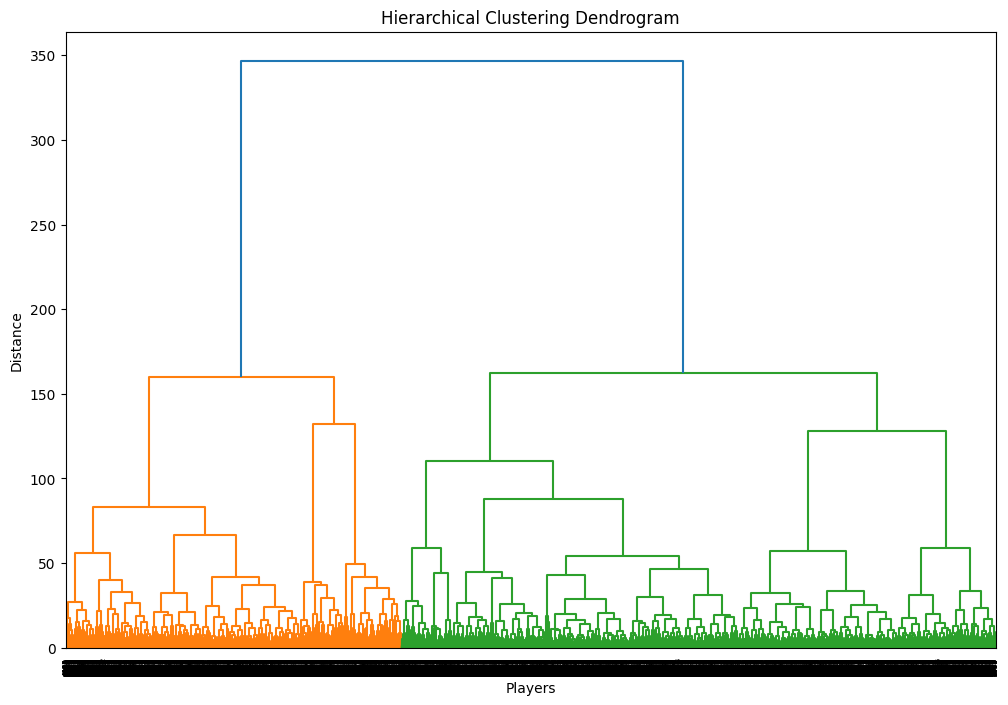

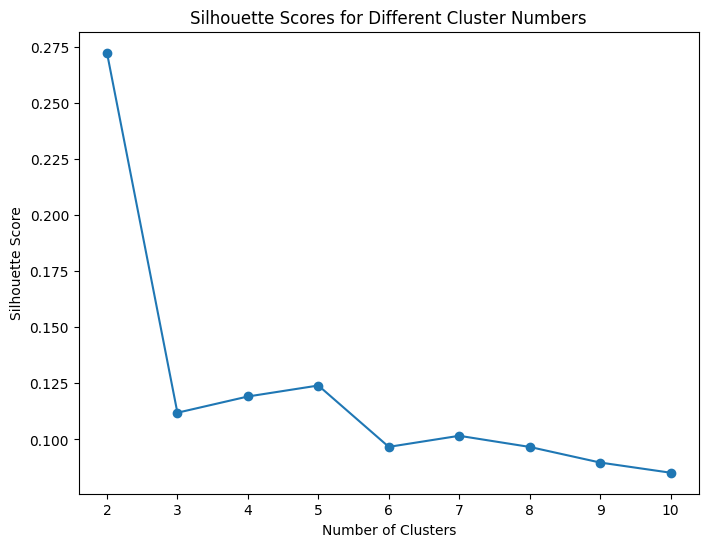

In [ ]:
#Question 3

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Load in the data
nba = pd.read_csv('https://raw.githubusercontent.com/andrewjingalls/chapman/main/NBA_PLAYER_DATA.csv')

# Drop missing values in continuous variables
nba_continuous = nba.dropna(subset=['Age', 'GP', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                                  'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
                                  'BLK', 'TO', 'PTS', 'W/L%'])

# Standardize continuous variables
scaler = StandardScaler()
nba_continuous_scaled = scaler.fit_transform(nba_continuous[['Age', 'GP', 'MP', 'FG', 'FGA',
                                                           'FG%', '3P', '3PA', '3P%', 'FT',
                                                           'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
                                                           'AST', 'STL', 'BLK', 'TO', 'PTS',
                                                           'W/L%']])

# Hierarchical clustering
linkage_matrix = linkage(nba_continuous_scaled, method='ward', metric='euclidean')

# Evaluate silhouette scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):
    cluster_labels = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit_predict(nba_continuous_scaled)
    silhouette_scores.append(silhouette_score(nba_continuous_scaled, cluster_labels))

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Players')
plt.ylabel('Distance')
plt.show()

# Plot silhouette scores against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
#Question 4

# Load in the data
nba = pd.read_csv('https://raw.githubusercontent.com/andrewjingalls/chapman/main/NBA_PLAYER_DATA.csv')

# Handle missing values appropriately for continuous variables
nba_continuous = nba[['Age', 'GP', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'W/L%']].dropna()

# Normalize the continuous variables
scaler = StandardScaler()
nba_continuous_normalized = scaler.fit_transform(nba_continuous)

# Apply PCA to the subset of continuous variables related to player performance
pca = PCA()
pca.fit(nba_continuous_normalized)

# Scree plot to visualize the variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Scree Plot - Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the optimal number of components (elbow point in scree plot)

# Select the optimal number of components (e.g., first 2 or 3 components)
n_components = 2
pca_selected = PCA(n_components=n_components)
principal_components = pca_selected.fit_transform(nba_continuous_normalized)

# Create a biplot to illustrate the loadings of the original variables on the principal components
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scale = 1.0

    for i in range(n):
        plt.arrow(0, 0, scale * coeff[i, 0], scale * coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0], coeff[i, 1], "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0], coeff[i, 1], labels[i], color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

import seaborn as sns

# Heatmap to illustrate the loadings of the original variables on the principal components
plt.figure(figsize=(12, 8))
sns.heatmap(pca_selected.components_, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=nba_continuous.columns, yticklabels=['PC1', 'PC2'])
plt.title('Principal Component Analysis - Loadings Heatmap')
plt.show()

# Line chart to depict the correlation of principal components with team W/L% across different seasons
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_components + 1), pca_selected.components_[0][:n_components], label='PC1', marker='o')
plt.plot(range(1, n_components + 1), pca_selected.components_[1][:n_components], label='PC2', marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Component Weights')
plt.title('Correlation of Components with Team W/L%')
plt.legend()
plt.show()



NameError: ignored

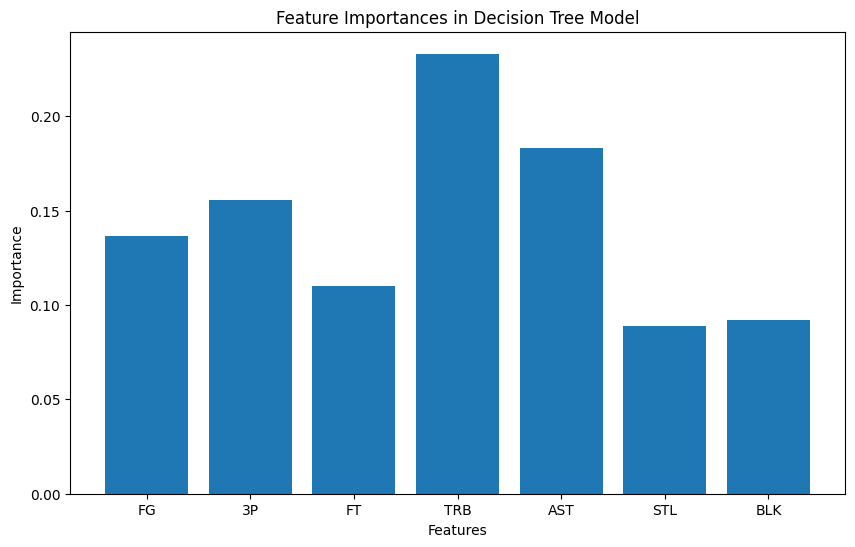

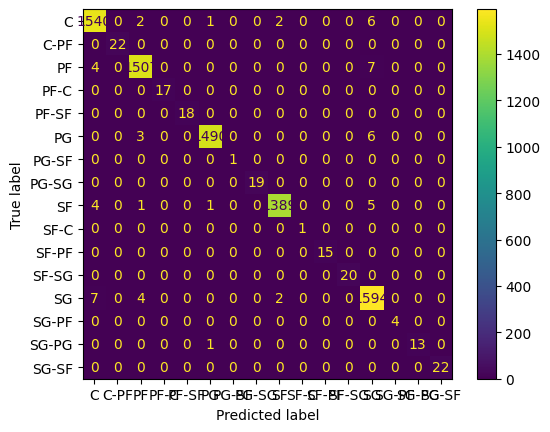

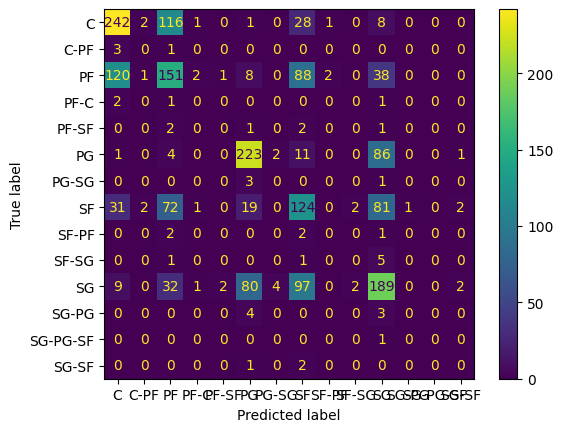

In [ ]:
#Question 5

#Load in the data
nba = pd.read_csv('https://raw.githubusercontent.com/andrewjingalls/chapman/main/NBA_PLAYER_DATA.csv')

predictors = ["FG","3P","FT","TRB","AST","STL","BLK"]
X = nba[predictors]
y = nba["Pos"]

# z scoring not important, because none of the variables are influencing/compared to each other directly
# scale doesn't matter here. But z scoring wont hurt.


# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# create empty model
pre = make_column_transformer((StandardScaler(), predictors),
                              remainder = "passthrough")
tree = DecisionTreeClassifier(random_state = 1234)

pipe = Pipeline([
    ("preprocessing", pre),
    ("tree", tree)
])

# fit
pipe.fit(X_train, y_train)

# Feature importances
feature_importances = pipe.named_steps['tree'].feature_importances_

# Creating the feature importance graph
plt.figure(figsize=(10, 6))
plt.bar(predictors, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree Model')
plt.show()

# predict/assess
print(ConfusionMatrixDisplay.from_predictions(y_train, pipe.predict(X_train)))
print(ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test)))

0.5275241685466737


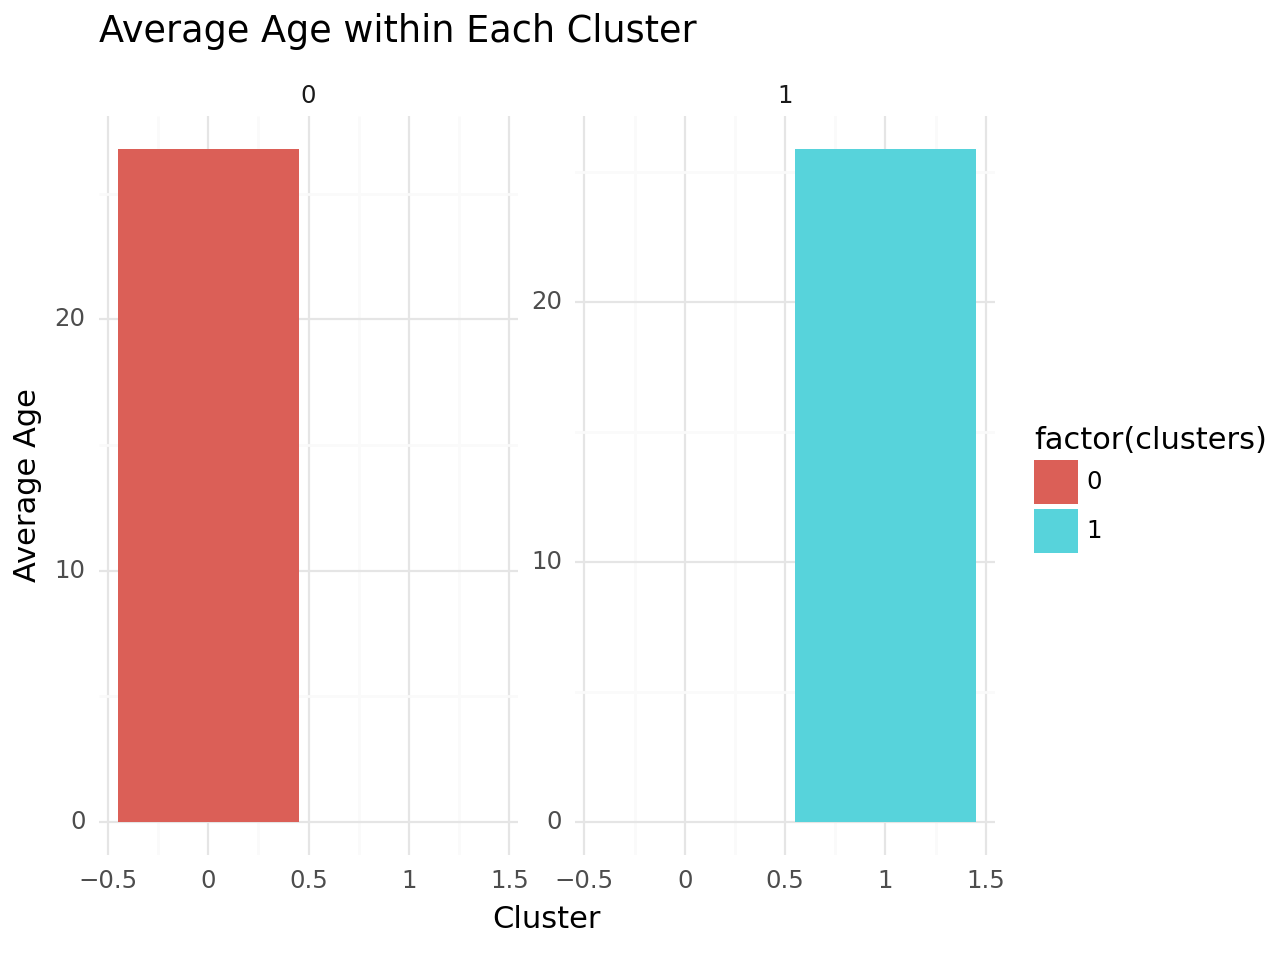

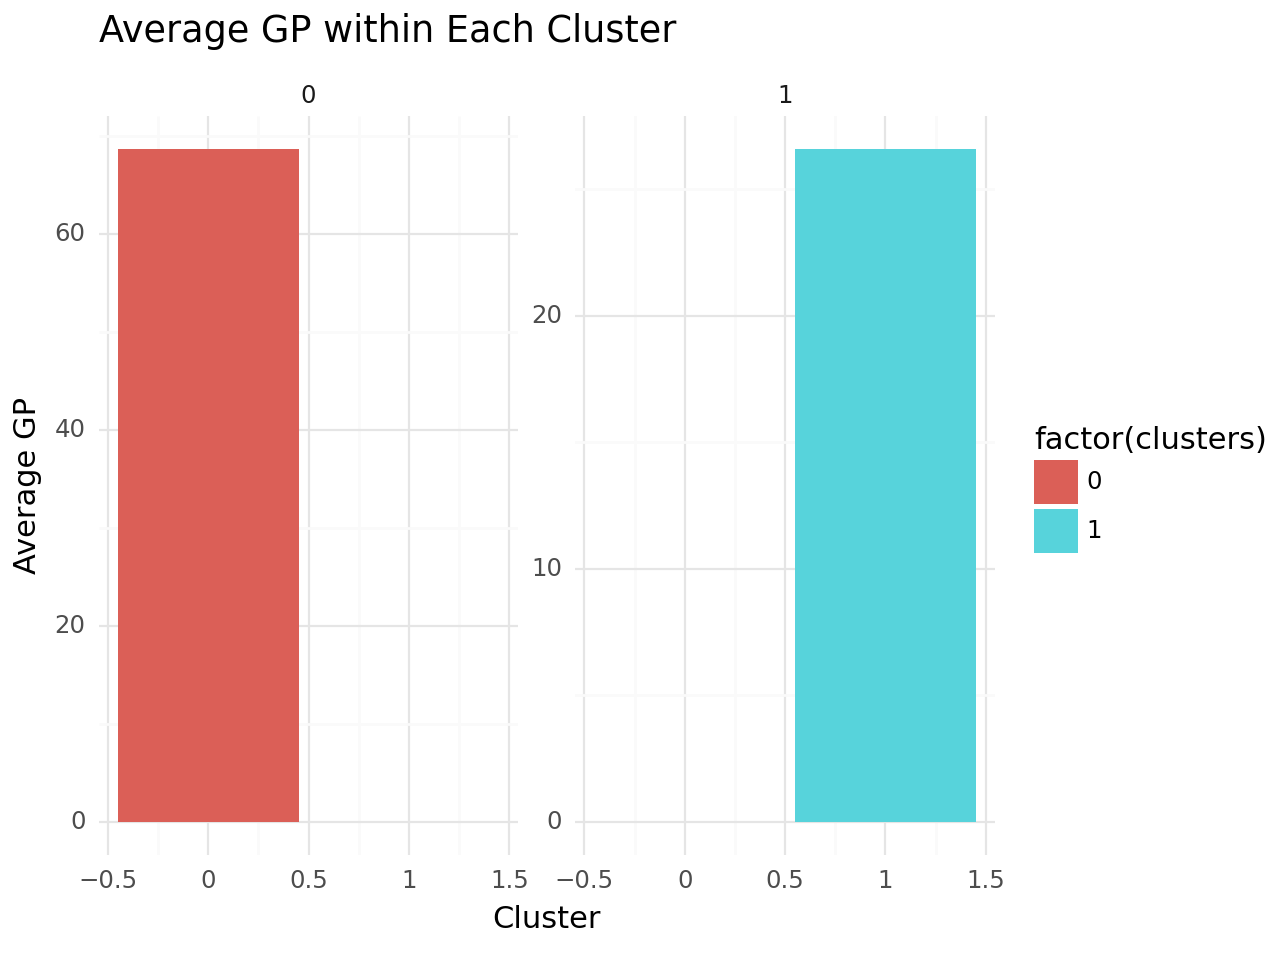

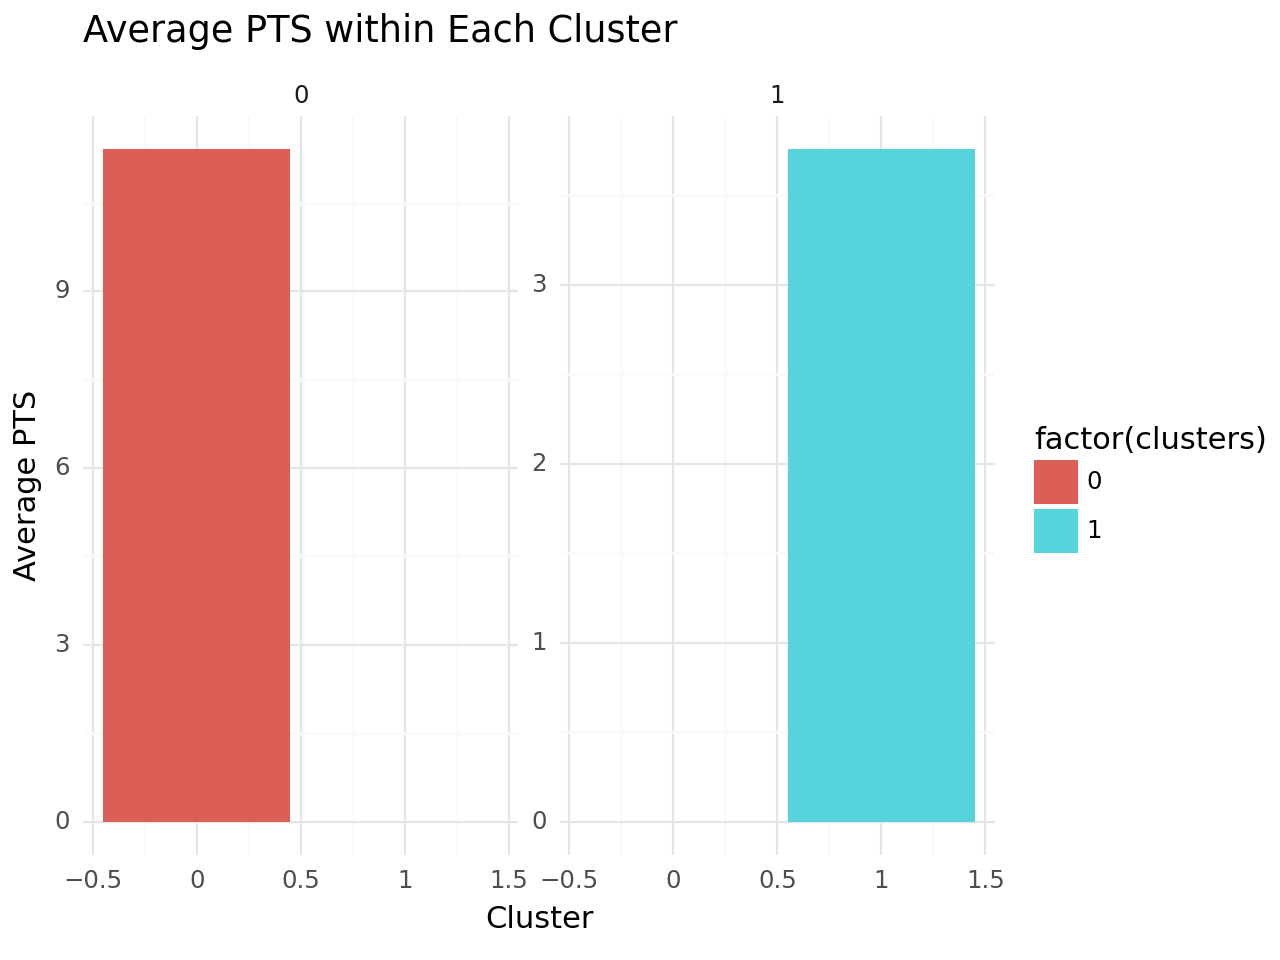

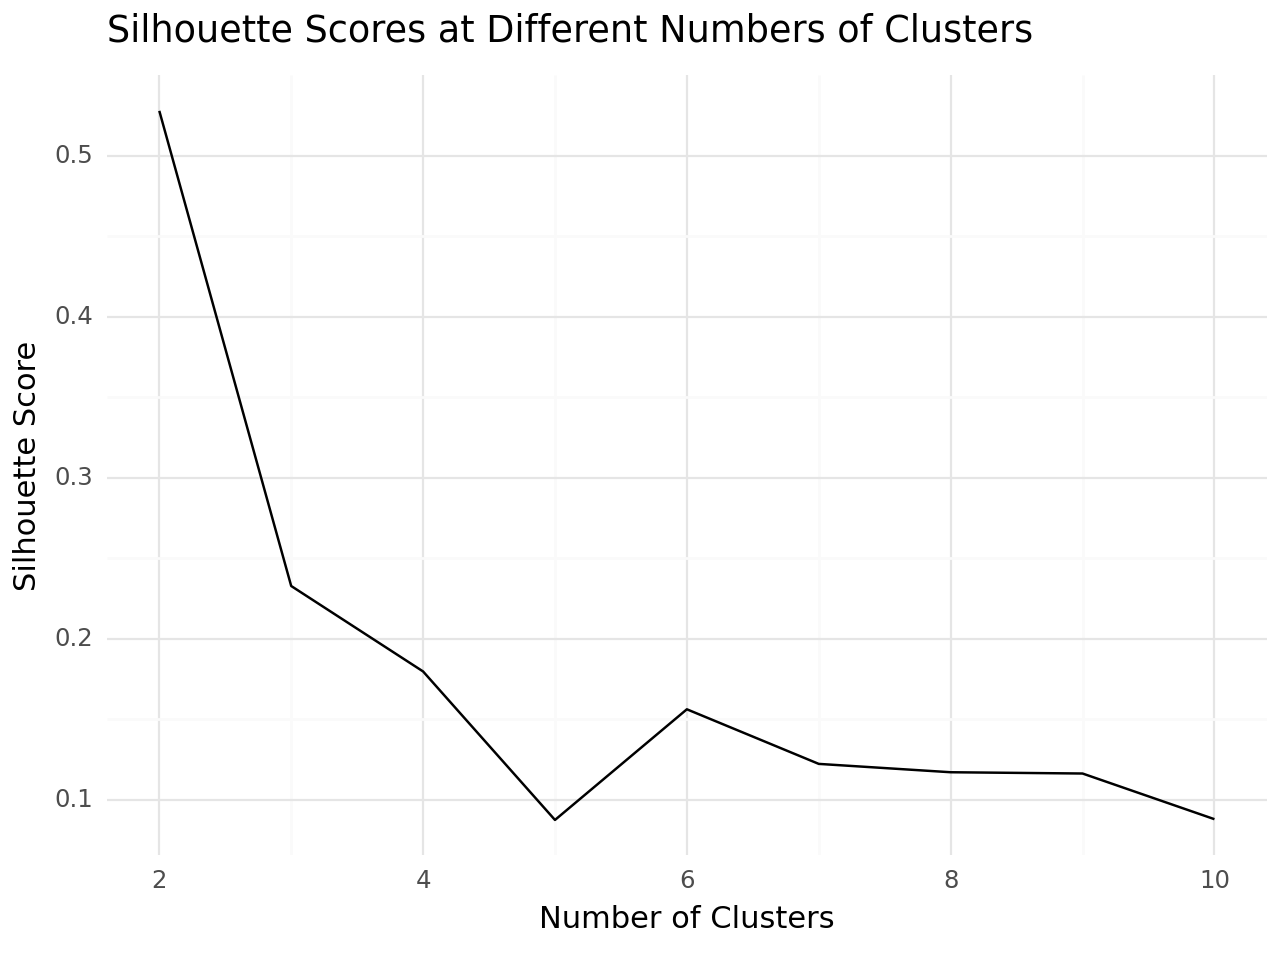

In [ ]:
#Question 6

nba = pd.read_csv("https://raw.githubusercontent.com/andrewjingalls/chapman/main/NBA_PLAYER_DATA.csv")

# drop missing values
nba.dropna(inplace = True)
nba.reset_index(inplace = True)

# set up X and y
predictors = ["Age", "GP", "PTS"]


X = nba[predictors]

#### STEP 2. ####
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")



#### STEP 3. ####
km = KMeans(n_clusters = 2)
pipe = Pipeline([("z", z), ("clust", km)])

#### STEP 4. ####
labels = pipe.fit_predict(X)

#### STEP 5. ####

print(silhouette_score(X, pipe.predict(X)))
X["clusters"] = labels

variable_names = predictors

for variable in variable_names:
    # Create a separate DataFrame for each variable
    variable_df = X[['clusters', variable]]
    variable_means = variable_df.groupby('clusters').mean().reset_index()

    # Bar chart
    bar_chart = (
        ggplot(variable_means, aes(x='clusters', y=variable, fill='factor(clusters)')) +
        geom_bar(stat='identity') +
        theme_minimal() +
        labs(title=f'Average {variable} within Each Cluster', x='Cluster', y=f'Average {variable}') +
        facet_wrap('~clusters', scales='free_y')
    )
    print(bar_chart)


silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters)
    pipe = Pipeline([("z", z), ("clust", km)])
    labels = pipe.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Line chart
line_chart = (
    ggplot(pd.DataFrame({'Clusters': cluster_range, 'Silhouette Score': silhouette_scores}),
           aes(x='Clusters', y='Silhouette Score')) +
    geom_line() +
    theme_minimal() +
    labs(title='Silhouette Scores at Different Numbers of Clusters',
         x='Number of Clusters', y='Silhouette Score')
)
print(line_chart)